# Family expenditure and trends

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from logging import warning
warnings.filterwarnings('ignore')
# Local package costau_byw (welsh for cost of living)
import utils as ut

# Constants
df = pd.read_csv("../data/csv/df.csv")
average = df[df['category'] == 'Average per person']
df = df[df['category'] != 'Average per person']
df = df.sort_values(by = ['year', 'category'])

df_percentage = pd.read_csv("../data/csv/df_percentages.csv")

# My colour pallete for 13 categories
my_palette = ['#e63946', '#ff8929', '#ffcdb2', '#ebe534', 
              '#028090', '#3deb34', '#34ebc0', '#1976d2', 
              '#390099', '#fb6f92', '#94157a', '#827f7f', 
              '#0f0202']


## Summary

I have explored the family spending workbook to assess changes in expenditure from 2001 to 2020. The results show that spending has relatevly stable in terms of proportion of spending within each category, except periods of economic uncertainty or important external factors, such as the rules put in place during COVID. The catergories most affected by a decrease in spending were recreation and culture, restaurants and hotels and transport. 


### Introduction

The purpose of this project is to explore which categories are more affected by an increase or a decrease in expenditure. People's spending habbits are affected by many factors, including external events (e.g., recession, pandemic), a change in personal circumstances (e.g., loss or reduction of income). I am going to focus on exploring the expenditure for different categories from 2001 to 2020. Understanding changes in expenditure is relevant for policy development, either for funding allocation and support, or for taxation purposes.

### Methodology

For this exploration, I used the family spending workbook published by the ONS, more specifically Table 4.3 from the 
[FYE2021](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/expenditure/datasets/familyspendingworkbook1detailedexpenditureandtrends), published by the Office for National Statistics (ONS). 
The dataset contains a table with the total expenditure by category from 2001 to 2020. The values in this table are not adjusted for inflation. 

#### Data processing
First, the labelling of the years in the dataset was corrected  and then the values were corrected for inflation, using the [CPI INDEX](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7bt/mm23) and adjusting all the values to the 2015 rate (*see*  notebooks/data_processing.ipynb). This brings the values on the same scale, however the expenditure values do not reflect current prices. Subsequently, the dataset was melted to a tidy format. 


### Main findings

#### Yearly expenditure

First, I am going to look at the yearly expenditure by category. 

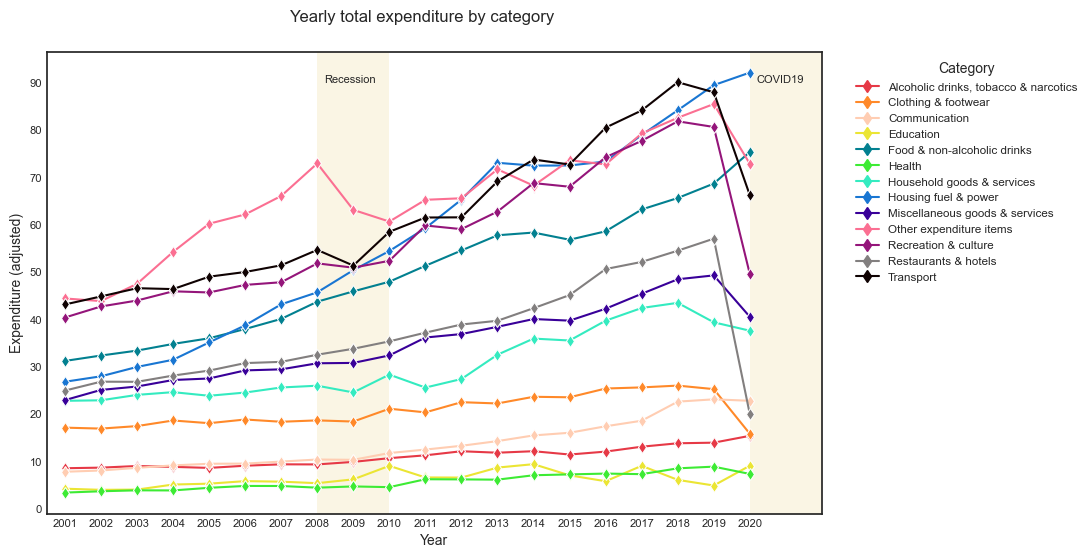

In [10]:
# Plot yearly expenditure
fig = plt.figure(figsize= (10,6))
p = sns.lineplot(data= df, x= 'year', y='adjusted_expenditure', hue = 'category',
    palette = my_palette,  style="category", markers="d", dashes=False)
p.axvspan(2008, 2010, facecolor='#faf4e1', alpha=.9)
p.text(2008.18, 90, 'Recession', fontsize = 8)
p.axvspan(2020, 2022, facecolor='#faf4e1', alpha=.9)
p.text(2020.18, 90, 'COVID19', fontsize = 8)
plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 1.0), fontsize=8)
plt.yticks(np.arange(0, max(df['adjusted_expenditure'])+1, 10), fontsize=8)
p.set_xlabel("Year", fontsize = 10)
p.set_ylabel("Expenditure (adjusted)", fontsize = 10)
p.set(xlim = (2000.5, 2022))
plt.legend(bbox_to_anchor=(1.03,1), loc = 'upper left', title = 'Category', fontsize = 'small')
plt.style.use('seaborn-white')
plt.suptitle('Yearly total expenditure by category', fontsize=12, y = 0.95)
plt.show();



Figure 1: Yearly total expenditure by category. *See* Note 1.

Figure 1 shows interesting trends. Looking at the recession perdiod from 2008 to 2010 there are two categories that seem to reduce their spending: Transport and Other expenditure items. Other expenditure items include mortgage interest payments, licences, holiday spending, and money transfers and credit. Considering this was an economic crisis related to the mortgage lending and affordability, the results are expected.
For the COVID19 period (data is only shown for the year 2020-2021, *see* Note 1), there is a decrease in spending for transport, recreation and culture, miscellaneous goods and services, restaurants and hotels and clothing and footwear. It also shows an increase in spending for food and housing and power. This speding reflects the rules at the beggining of the pandemic and the fact that people spent more time at home. 

This plot shows a general increase in spending for most categories across the whole period, possibly reflecting general economic growth. Next, I am going to look at percentages from the total yearly spending for each category. This shoud reflect an increase or decrease in spending, excluding the economic growth. 

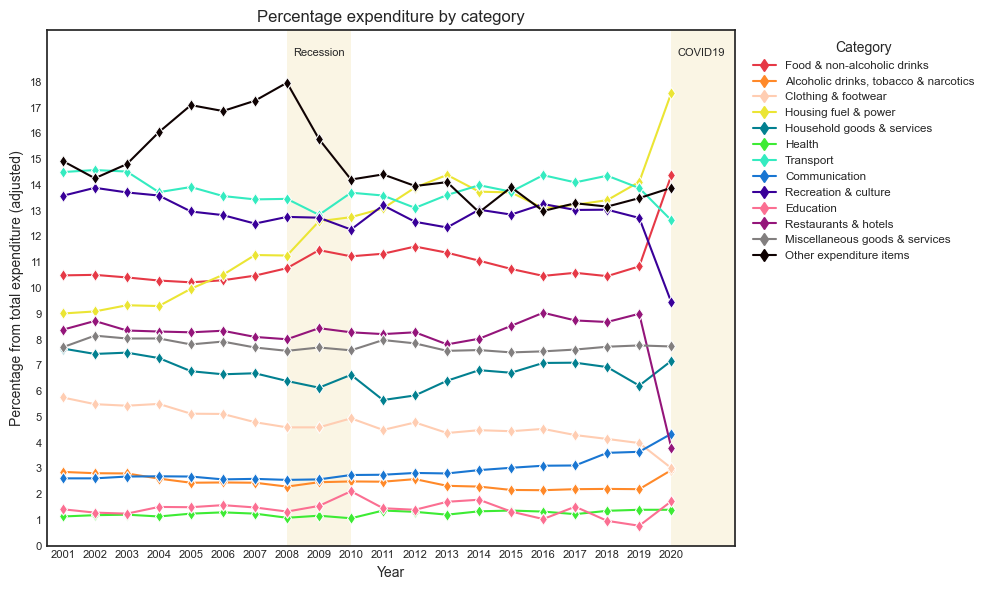

In [11]:
# Plot yearly percentage expenditure
fig = plt.figure(figsize= (10,6))
p = sns.lineplot(data= df_percentage, x= 'year', y='percentage', hue = 'category',
    palette = my_palette,  style="category", markers="d", dashes=False)
p.axvspan(2008, 2010, facecolor='#faf4e1', alpha=.9)
p.text(2008.18, 19, 'Recession', fontsize = 8)
p.axvspan(2020, 2022, facecolor='#faf4e1', alpha=.9)
p.text(2020.18, 19, 'COVID19', fontsize = 8)
plt.xticks(np.arange(min(df_percentage['year']), max(df_percentage['year'])+1, 1.0), fontsize=8)
plt.yticks(np.arange(0, max(df_percentage['percentage'])+1, 1.0), fontsize=8)
p.set_xlabel("Year", fontsize = 10)
p.set_ylabel("Percentage from total expenditure (adjusted)", fontsize = 10)
p.set(xlim = (2000.5, 2022), ylim = (0,20))
plt.legend(bbox_to_anchor=(1.01,1), loc = 'upper left', title = 'Category', fontsize = 'small')
plt.style.use('seaborn-white')
plt.title('Percentage expenditure by category', fontsize=12)
plt.tight_layout()
plt.show();



Figure 2: Percentage of each category from total yearly spending

Figure 2 shows that spending most categories were stable, except during the 2008 recession and the start of pandemic in 2020. During the recession, the biggest drop in spending was for the Other expenditures items, and smaller decreases were observed for transport. The figure also shows an increase in spending for fuel and power. 
At the beggining of the pandemic there was an increase in spending for food, housing fuel and power, and education most likely reflecting the fact that people spent more time at home. There was a decrease in spending for recreation and culture, restaurants and hotels and transport.   

### Analysis

There are not enough data points to conduct a statistical analysis to sustain these claims, however with more data points, the period of time of interest could be filtered and a mixed ANOVA conducted (analysis of variance; date/year as a within-subjects factor and the different categories as group, a between-subjects factor). An interaction between date and group (p< .05) would point towards some categories having different expenditure over time. This would lead to post-hoc comparisons with corrections for the alpha value (e.g., Bonferroni), t-tests for each category between two date values.

---
**NOTE**

<sub><sup> 1: Note that the year represented in the figures reffers to the entire year (for example 2020 is an average for the year 2020-2021, which includes the start of the pandemic). </sup></sub>

---